In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import re

In [3]:
# get loandata
loansData = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')

In [4]:
# clean interest rate using regex - ability to replace so df objects are mutable
loansData['Interest.Rate'] = [float(re.search('^[0-9]*.[0-9]*',loan).group(0))/100 for loan in loansData['Interest.Rate']]


In [5]:
# clean fico range and get score 
loansData['FICO.Score'] = map(lambda x: int(x.split('-')[0]), loansData['FICO.Range'])

In [6]:
loansData['FICO.Score'][:5]

81174    735
99592    715
80059    690
15825    695
33182    695
Name: FICO.Score, dtype: int64

In [7]:
loansData['Interest.Rate'][:5]

81174    0.0890
99592    0.1212
80059    0.2198
15825    0.0999
33182    0.1171
Name: Interest.Rate, dtype: float64

In [8]:
loansData['Amount.Requested'][:5]

81174    20000
99592    19200
80059    35000
15825    10000
33182    12000
Name: Amount.Requested, dtype: int64

In [9]:
# extract the columns from the data frame returning a series
intrate = loansData['Interest.Rate']
loanamt = loansData['Amount.Requested']
fico = loansData['FICO.Score']

In [10]:
# reshape the data
# The dependent variable
y = np.matrix(intrate).transpose()
# The independent variables shaped as columns
x1 = np.matrix(fico).transpose()
x2 = np.matrix(loanamt).transpose()

In [11]:
# put the columns back together to create a matrix
x = np.column_stack([x1,x2])

In [12]:
# create the linear model with statsmodels - # read more about stats models
X = sm.add_constant(x)
model = sm.OLS(y,X)
f = model.fit()

In [13]:
# show the output
# ********************************************* ask Kyle about the minor differences float vs int - rounding precision sig digits
f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     2388.
Date:                Wed, 10 Feb 2016   Prob (F-statistic):               0.00
Time:                        11:32:33   Log-Likelihood:                 5727.6
No. Observations:                2500   AIC:                        -1.145e+04
Df Residuals:                    2497   BIC:                        -1.143e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.7288      0.010     73.734      0.000         0.709     0.748
x1            -0.0009    1.4e-05    -63.022      0.000        -0.001    -0.001
x2          2.107e-06    6.3e-08     33.443      0.000      1.98e-06  2.23e-06
==============================================================================
Omnibus:                       69.496   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.811
Skew:                           0.379   Prob(JB):                     1.27e-17
Kurtosis:                       3.414   Cond. No.                     2.96e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
f.params  # get the parms for the calculation y = m + a(x) + b(x)


array([  7.28827983e-01,  -8.84424222e-04,   2.10747769e-06])

In [19]:
# loansData10k = [loansData for loan in (loansData['Amount.Requested'] == 10000)] # tried this to get just 10k but creats a list not a df


In [24]:
type(loansData10k)

list

In [33]:
# loansData.drop('Home.Ownership')

In [35]:
# data = data[data.population != 'sibling']

In [40]:
data10k = loansData[loansData['Amount.Requested'] == 10000]  ## Talk to Kyle about proper referencing here.

In [43]:
data30k = loansData[loansData['Amount.Requested'] == 30000] 

In [38]:
type(data10k)

pandas.core.frame.DataFrame

In [41]:
data10k.shape

(206, 16)

In [15]:
# loansData['testfico'] = [loansData['FICO.Score'] for loan in loansData['Interest.Rate']] didn't work got multiple values in testfico

In [16]:
type(loansData)

pandas.core.frame.DataFrame

In [44]:
# df[df.a > df.b]  # same result as the previous expression

In [45]:
# loansData[loansData.testfico.any() > 100] does not work

In [ ]:
row1 = loansData[100:101] # grab a data point for the line

In [ ]:
row2 = loansData[200:201] # grab a second data point for the line

In [ ]:
# Create a list of Y values using row 1 and 2 from above
ytest = []
ytest.append(f.params[0] + (max(row1['FICO.Score'])* f.params[1]) + (max(row1['Interest.Rate']) * f.params[2]))
ytest.append(f.params[0] + (max(row2['FICO.Score'])* f.params[1]) + (max(row2['Interest.Rate']) * f.params[2]))

In [ ]:
ytest

In [ ]:
# put the x values in a list
# have to convert the pandas series data type to a plain list with tolist()
xtest = []
xtemp = row1['FICO.Score'].tolist()
xtest.append(xtemp[0])
xtemp = row2['FICO.Score'].tolist()
xtest.append(xtemp[0])

In [59]:
# generate the data for the 10k line
ydata = []
xdata = []
for index, row in data10k.iterrows():
    ydata.append(f.params[0] + row['FICO.Score'] * f.params[1] + row['Interest.Rate'] * f.params[2])
#     print(row['FICO.Score'], row['Interest.Rate'])
#     xtemp = row['FICO.Score'].tolist()
    xdata.append(row['FICO.Score'])
    

In [60]:
type(xdata)

list

In [57]:
type(ydata)

list

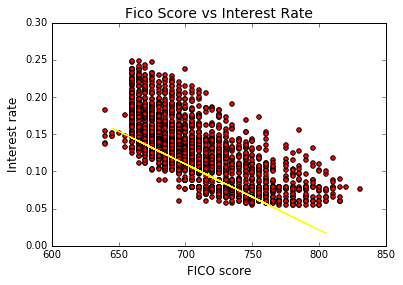

In [61]:
# It's much more convenient to just use pyplot's factory functions...
fig, ax = plt.subplots()

ax.set_title("Fico Score vs Interest Rate",fontsize=14)
ax.set_xlabel("FICO score",fontsize=12)
ax.set_ylabel("Interest rate",fontsize=12)

plt.scatter(loansData['FICO.Score'],loansData['Interest.Rate'], c='red')

plt.plot(xdata, ydata, c = 'yellow')



In [ ]:
plt.scatter(loansData['FICO.Score'],loansData['Interest.Rate'], c='red')

In [ ]:
loansData['Interest.Rate'][:5]

In [ ]:
loansData['FICO.Score'][:5]

In [ ]:
loansData['Amount.Requested'][:5]

In [ ]:
x.shape

In [ ]:
my_y =[2,10]

In [ ]:
my_x = [4,20]

In [ ]:
plt.plot(my_x,my_y)

In [ ]:
loansData.plt.plot(kind='scatter', x=loansData['FICO.Score'], y=loansData['In'],color='DarkBlue')

In [ ]:
ax = loansData.plot(kind='scatter', x=intrate, y=fico,color='DarkBlue', label='Group 1')

In [ ]:
# fig, ax = plt.subplots()
# >>> fig = sm.graphics.plot_fit(results, 0, ax=ax)
# >>> ax.set_ylabel("Murder Rate")
# >>> ax.set_xlabel("Poverty Level")
# >>> ax.set_title("Linear Regression")

# fig, ax = plt.subplots()
# fig = sm.graphics.plot_fit(f, 0 , ax = ax)
# ax.set_ylabel("FICO Score")
# ax.set_xlabel("Interest Rate")
# ax.set_title("Linear Regression")

In [ ]:
df = pd.read(x)